In [85]:
import	csv
import	matplotlib.pyplot as plt
import pandas as pd
import	platform
import	koreanize_matplotlib

In [86]:
max_station = ''
max_total = -1

file_name='subwaytime.csv'
dataDF=pd.read_csv(file_name)
dataDF.drop([0],axis=0,inplace=True)

In [87]:
hacha_data = dataDF.loc[:, ['호선명','지하철역','Unnamed: 11','Unnamed: 13']]
hacha_data

,호선명,지하철역,Unnamed: 11,Unnamed: 13
1,1호선,서울역,115372,224224
2,1호선,시청,71550,183563
3,1호선,종각,106889,249815
4,1호선,종로3가,28024,65287
5,1호선,종로5가,40044,91110
...,...,...,...,...
618,신림선,당곡,3680,8693
619,신림선,신림,1493,2688
620,신림선,서원,1405,2360
621,신림선,서울대벤처타운,6223,10011


In [88]:
hacha_data = hacha_data.set_index('호선명')
hacha_data = hacha_data.rename(columns={'Unnamed: 11':'07:00~07:59하차','Unnamed: 13':'08:00~08:59하차'})
sum_result=hacha_data['07:00~07:59하차'].astype('int64') + hacha_data['08:00~08:59하차'].astype('int64')
station_name=hacha_data['지하철역']
new_data=pd.concat([station_name,sum_result],axis=1)
new_data

# pd.merge(sum_result,station_name,how='inner')
# hacha_data.astype(int,'07:00~07:59하차')
# hacha_data.astype(int,'08:00~08:59하차')


,지하철역,0
호선명,,
1호선,서울역,339596
1호선,시청,255113
1호선,종각,356704
1호선,종로3가,93311
1호선,종로5가,131154
...,...,...
신림선,당곡,12373
신림선,신림,4181
신림선,서원,3765


In [89]:
one_data=new_data.loc['1호선']
two_data=new_data.loc['2호선']
thr_data=new_data.loc['3호선']
fth_data=new_data.loc['4호선']
ffh_data=new_data.loc['5호선']
six_data=new_data.loc['6호선']
sev_data=new_data.loc['7호선']


In [90]:
one_data=one_data[one_data[0]==one_data[0].max()]
two_data=two_data[two_data[0]==two_data[0].max()]
thr_data=thr_data[thr_data[0]==thr_data[0].max()]
fth_data=fth_data[fth_data[0]==fth_data[0].max()]
ffh_data=ffh_data[ffh_data[0]==ffh_data[0].max()]
six_data=six_data[six_data[0]==six_data[0].max()]
sev_data=sev_data[sev_data[0]==sev_data[0].max()]

# all_data=pd.concat(one_data,two_data,thr_data,fth_data,ffh_data,six_data,sev_data,axis=0)
# all_data


In [91]:
# y축 값 만들기

bar_y_val=[one_data[0].max(),two_data[0].max(),thr_data[0].max(),fth_data[0].max(),ffh_data[0].max(),six_data[0].max(),sev_data[0].max()]
bar_y_val

[356704, 488949, 318850, 224078, 340464, 131646, 494848]

In [92]:
# x 라벨 만들기
bar_x_val=['1호선 '+one_data['지하철역'].max(),
           '2호선 '+two_data['지하철역'].max(),
           '3호선 '+thr_data['지하철역'].max(),
           '4호선 ' +fth_data['지하철역'].max(),
           '5호선 '+ffh_data['지하철역'].max(),
           '6호선 '+six_data['지하철역'].max(),
           '7호선 '+sev_data['지하철역'].max()]
bar_x_val

['1호선 종각',
 '2호선 역삼',
 '3호선 양재(서초구청)',
 '4호선 충무로',
 '5호선 여의도',
 '6호선 공덕',
 '7호선 가산디지털단지']

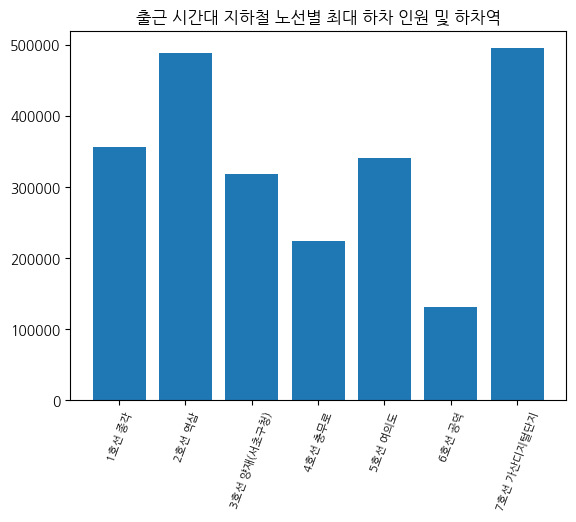

In [93]:
plt.bar(bar_x_val,bar_y_val)
plt.title("출근 시간대 지하철 노선별 최대 하차 인원 및 하차역")
plt.xticks(fontsize=8,rotation=70)
plt.show()